In [1]:
import sampling as smp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
training = pd.read_msgpack('training.bin')
training.head(10)

,subject,img,pixels,maskArea,maskC,maskS,maskV,maskContour,hasmask,XYextents,maskW,maskH
0,1,1,168153 9 168570 15 168984 22 169401 26 169818 ...,4616,"[126.029160236, 439.591836735]","[621.287895392, 394.154314608]","[[-0.761469804951, 0.648200382711], [0.6482003...","[[170, 421], [170, 420], [170, 419], [170, 418...",True,"[83, 170, 399, 482]",87,83
1,1,2,96346 7 96762 16 97179 27 97595 35 98012 40 98...,6311,"[146.071623238, 267.981432361]","[753.516961397, 491.618855359]","[[-0.946015668958, 0.324120894244], [-0.324120...","[[200, 262], [200, 261], [200, 260], [200, 259...",True,"[90, 200, 228, 306]",110,78
2,1,3,121957 2 122365 26 122784 28 123202 31 123618 ...,8015,"[123.729124065, 342.257336343]","[893.204928975, 616.231553395]","[[-0.774462581142, 0.63261972022], [0.63261972...","[[179, 320], [179, 319], [179, 318], [179, 317...",True,"[66, 179, 289, 395]",113,106
3,1,4,110980 9 111393 21 111810 33 112228 43 112647 ...,3847,"[111.784953264, 295.111111111]","[450.413490617, 372.636715996]","[[-0.998466207677, -0.0553645385351], [0.05536...","[[151, 302], [151, 301], [151, 300], [151, 299...",True,"[74, 151, 263, 325]",77,62
4,1,5,NaN,0,NaN,NaN,NaN,NaN,False,"[0, 0, 0, 0]",0,0
5,1,6,NaN,0,NaN,NaN,NaN,NaN,False,"[0, 0, 0, 0]",0,0
6,1,7,172767 15 173175 29 173591 34 173993 7 174004 ...,5901,"[120.540621739, 448.201680672]","[671.546905531, 489.819017036]","[[-0.949186860844, 0.314713048986], [0.3147130...","[[169, 440], [169, 439], [169, 438], [169, 437...",True,"[68, 169, 410, 486]",101,76
7,1,8,NaN,0,NaN,NaN,NaN,NaN,False,"[0, 0, 0, 0]",0,0
8,1,9,NaN,0,NaN,NaN,NaN,NaN,False,"[0, 0, 0, 0]",0,0
9,1,10,NaN,0,NaN,NaN,NaN,NaN,False,"[0, 0, 0, 0]",0,0


## Recalculate contours

.

/Users/chrisv/anaconda/lib/python3.4/site-packages/skimage/external/tifffile/tifffile.py:1794: RuntimeWarning: py_decodelzw encountered unexpected end of stream
  strip = decompress(strip)


Idx   84: [5, 379]
...Idx  798: [411, 5]
Idx  800: [17, 453, 5, 5]
..Idx 1270: [329, 5]
.Idx 1513: [433, 5, 5, 5]
.Idx 1914: [5, 485]
.Idx 2221: [401, 5, 5, 5, 5, 5, 5, 5]
Idx 2236: [675, 5]
..Idx 2735: [477, 5]
..Idx 3062: [5, 373]
.Idx 3428: [5, 487]


/Users/chrisv/anaconda/lib/python3.4/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


..Idx 3898: [405, 5]
.Idx 4157: [7, 7, 413]
Idx 4175: [5, 445, 5, 5]
.Idx 4277: [383, 5]
Idx 4296: [331, 7]
...Idx 5019: [5, 363]
..

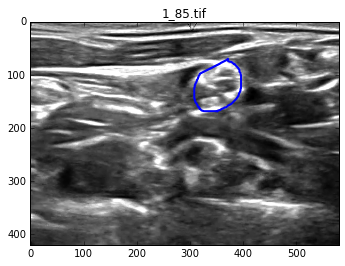

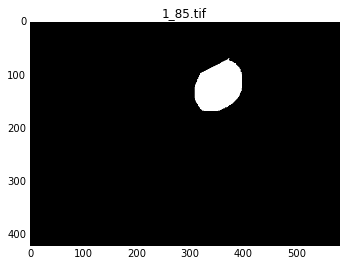

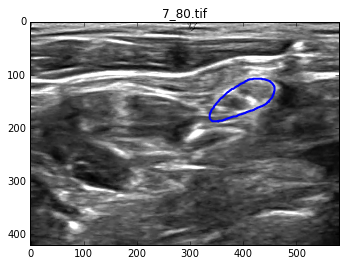

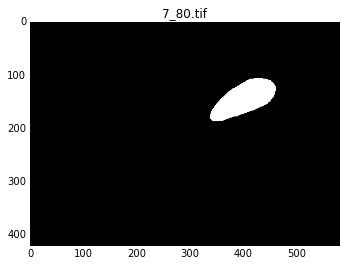

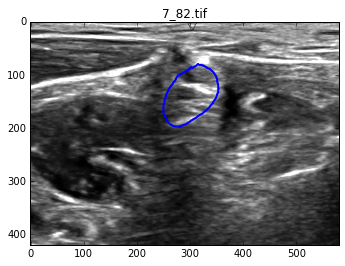

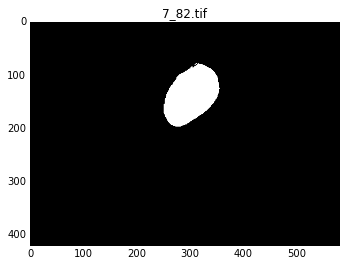

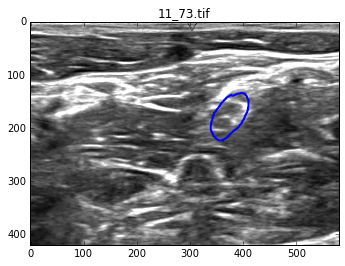

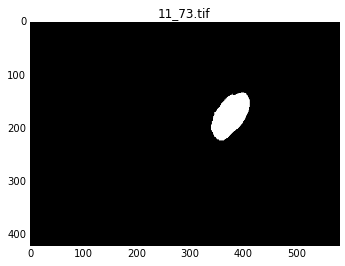

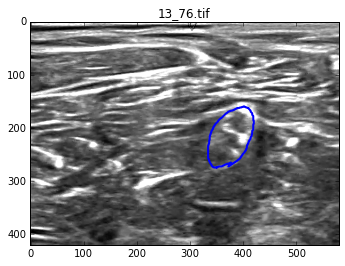

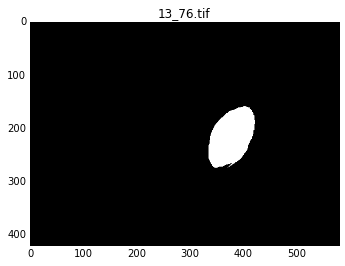

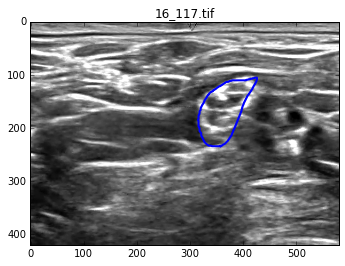

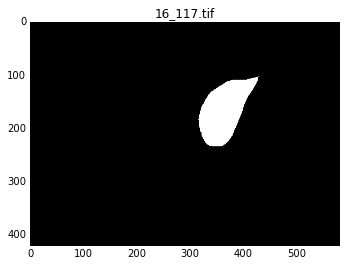

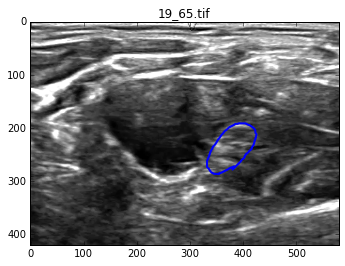

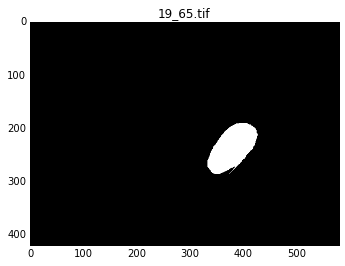

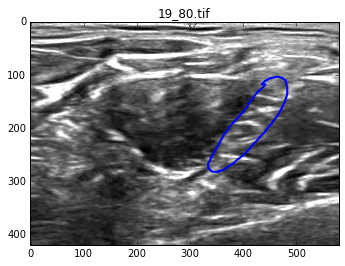

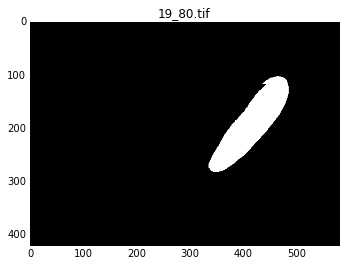

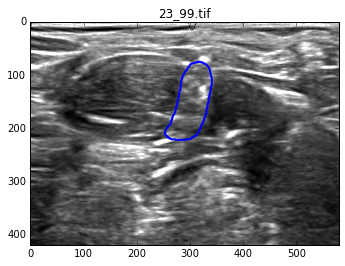

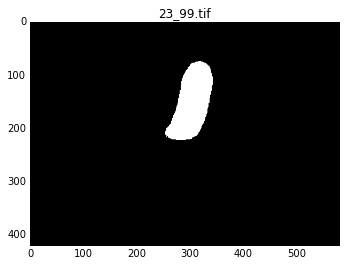

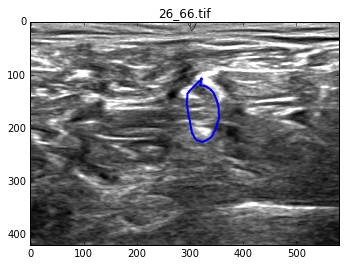

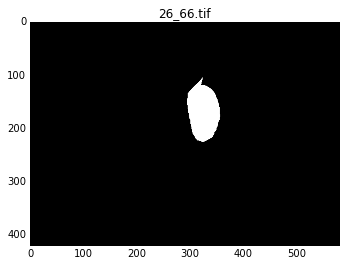

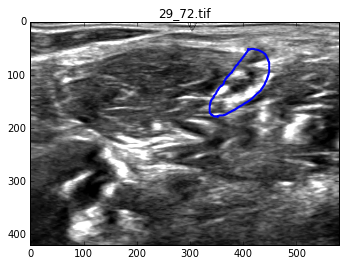

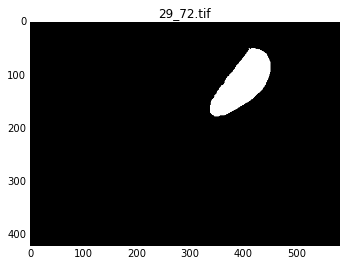

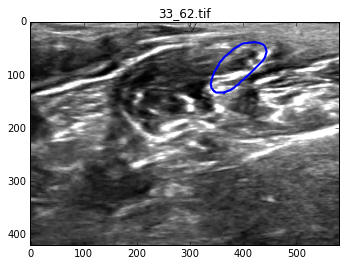

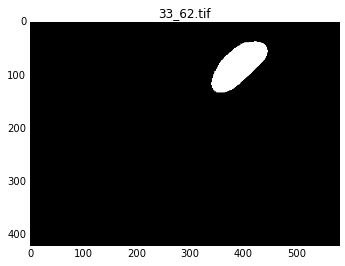

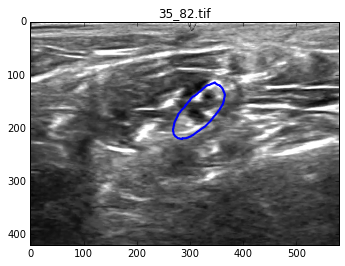

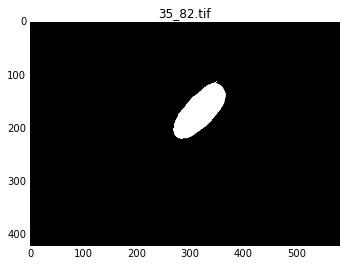

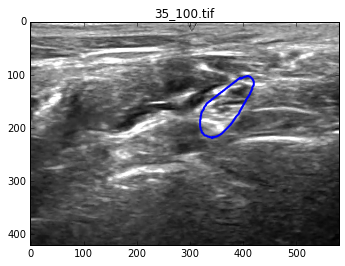

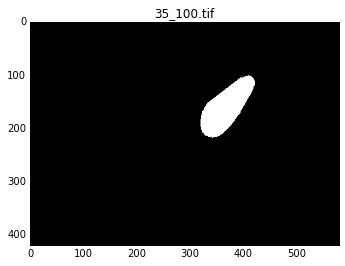

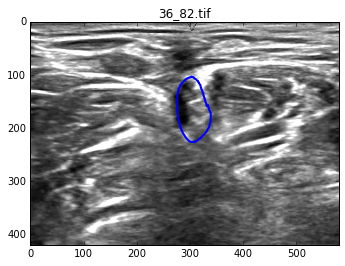

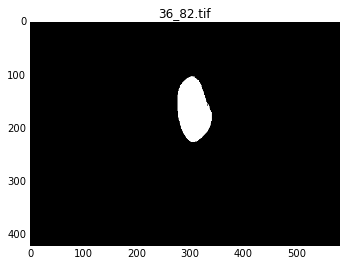

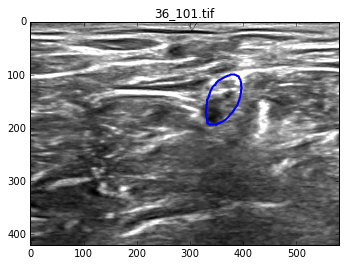

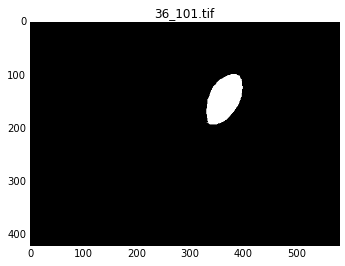

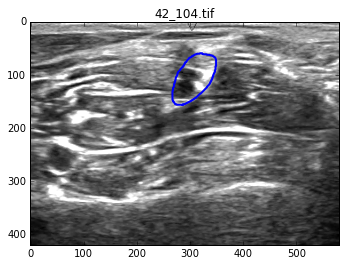

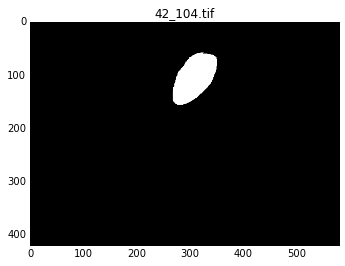

In [7]:
indices = []
for row in training.iterrows():
    if row[0] % 250 == 0: 
        print('.', end='')
    im = smp.image_pair(row[1]['subject'], row[1]['img'])
    try:
        if len(im.contours)>1:
            lengths = [contour.shape[0] for contour in im.contours]
            print('Idx {:4d}: {}'.format(row[0],str(lengths)))
            im.plot()
            im.plotmask()
    except AttributeError:
        pass

In [43]:
indices = [84, 798, 800, 1270, 1513, 1914, 2221, 2236, 2735, 3062, 3428, 3898, 4157, 4175, 4277, 4296, 5019]
for row in training.ix[indices].iterrows():
    im = smp.image_pair(row[1]['subject'], row[1]['img'])
    row[1]['maskContour'] = im.contour.astype(np.int16)
    training.ix[row[0]] = row[1]
training.ix[indices]

,subject,img,pixels,maskArea,maskC,maskS,maskV,maskContour,hasmask,XYextents,maskW,maskH
84,1,85,129485 21 129900 30 130317 36 130736 38 131153...,6534,"[69.0003921569, 373.0]","[0.0032810197119, 0.00277296776936]","[[-1.0, -0.0], [0.0, 1.0]]","[[168, 351], [168, 350], [168, 349], [168, 348...",True,"[68, 69, 372, 373]",1,1
798,7,80,141715 9 142132 13 142550 16 142967 20 143386 ...,5818,"[147.403897715, 397.912408759]","[862.638466977, 425.703714155]","[[-0.433775123606, 0.901021166311], [0.9010211...","[[187, 353], [187, 352], [187, 351], [187, 350...",True,"[106, 187, 336, 459]",81,123
800,7,82,105157 17 105576 20 105988 30 106405 36 106822...,8380,"[80.0589388697, 309.941176471]","[6.43116441968, 2.13669109979]","[[-0.416902249863, 0.908951326562], [0.9089513...","[[197, 281], [197, 280], [197, 279], [197, 278...",True,"[78, 81, 307, 312]",3,5
1270,11,73,142575 11 142989 19 143408 21 143822 30 144239...,4204,"[177.361708087, 374.130699088]","[585.346268954, 363.050388534]","[[-0.852095420105, 0.523386468144], [-0.523386...","[[223, 362], [223, 361], [223, 360], [223, 359...",True,"[133, 223, 338, 410]",90,72
1513,13,76,140514 25 140931 30 141344 40 141756 50 142173...,7131,"[219.84065118, 376.565819861]","[863.909271624, 553.742198169]","[[-0.913709335906, 0.40636836673], [0.40636836...","[[274, 350], [274, 349], [274, 348], [274, 347...",True,"[158, 274, 333, 420]",116,87
1914,16,117,132485 2 132897 22 133315 26 133729 39 134148 ...,8436,"[104.000392157, 427.0]","[0.0032810197119, 0.00277296776936]","[[-1.0, -0.0], [0.0, 1.0]]","[[234, 357], [234, 356], [234, 355], [234, 354...",True,"[103, 104, 426, 427]",1,1
2221,19,65,139702 13 140120 16 140537 20 140955 23 141372...,5643,"[239.980054765, 377.795511222]","[737.611416169, 468.683339447]","[[-0.760694181302, 0.649110439397], [0.6491104...","[[286, 354], [286, 353], [286, 352], [286, 351...",True,"[190, 286, 331, 425]",96,94
2236,19,80,140548 9 140966 11 141384 14 141802 18 142220 ...,10697,"[193.583706609, 411.34962963]","[1754.06588353, 622.108754443]","[[-0.793306029333, 0.608823080889], [0.6088230...","[[282, 353], [282, 352], [282, 351], [282, 350...",True,"[102, 282, 333, 483]",180,150
2735,23,99,106467 7 106885 10 107302 14 107317 1 107721 1...,8151,"[153.220129897, 300.597484277]","[1124.63315684, 543.897165013]","[[-0.952954120098, 0.303114574028], [-0.303114...","[[222, 291], [222, 290], [222, 289], [222, 288...",True,"[74, 222, 252, 341]",148,89
3062,26,66,123626 13 124036 30 124455 38 124874 46 125292...,5172,"[105.000392157, 323.0]","[0.0032810197119, 0.00277296776936]","[[-1.0, -0.0], [0.0, 1.0]]","[[226, 324], [226, 323], [226, 322], [226, 321...",True,"[104, 105, 322, 323]",1,1


## pull out rectangles around mask

In [44]:
def extents(maskContour):
    minx, miny, maxx, maxy = [0,0,0,0]
    try:
        minx, miny = np.min(maskContour, axis=0)
        maxx, maxy = np.max(maskContour, axis=0)
    except:
        pass
    return np.array([minx, maxx, miny, maxy], dtype=np.int16)

training['XYextents'] = training['maskContour'].map(extents)
training['maskW'] = training['XYextents'].map(lambda x: x[1]-x[0])
training['maskH'] = training['XYextents'].map(lambda x: x[3]-x[2])


In [53]:
training_data['hasmask'] = training_data['pixels'].map(lambda x: not(pd.isnull(x)))

In [45]:
training.head()

,subject,img,pixels,maskArea,maskC,maskS,maskV,maskContour,hasmask,XYextents,maskW,maskH
0,1,1,168153 9 168570 15 168984 22 169401 26 169818 ...,4616,"[126.029160236, 439.591836735]","[621.287895392, 394.154314608]","[[-0.761469804951, 0.648200382711], [0.6482003...","[[170, 421], [170, 420], [170, 419], [170, 418...",True,"[83, 170, 399, 482]",87,83
1,1,2,96346 7 96762 16 97179 27 97595 35 98012 40 98...,6311,"[146.071623238, 267.981432361]","[753.516961397, 491.618855359]","[[-0.946015668958, 0.324120894244], [-0.324120...","[[200, 262], [200, 261], [200, 260], [200, 259...",True,"[90, 200, 228, 306]",110,78
2,1,3,121957 2 122365 26 122784 28 123202 31 123618 ...,8015,"[123.729124065, 342.257336343]","[893.204928975, 616.231553395]","[[-0.774462581142, 0.63261972022], [0.63261972...","[[179, 320], [179, 319], [179, 318], [179, 317...",True,"[66, 179, 289, 395]",113,106
3,1,4,110980 9 111393 21 111810 33 112228 43 112647 ...,3847,"[111.784953264, 295.111111111]","[450.413490617, 372.636715996]","[[-0.998466207677, -0.0553645385351], [0.05536...","[[151, 302], [151, 301], [151, 300], [151, 299...",True,"[74, 151, 263, 325]",77,62
4,1,5,NaN,0,NaN,NaN,NaN,NaN,False,"[0, 0, 0, 0]",0,0


In [54]:
training.to_msgpack('training.bin')

In [47]:
training.ix[indices]

,subject,img,pixels,maskArea,maskC,maskS,maskV,maskContour,hasmask,XYextents,maskW,maskH
84,1,85,129485 21 129900 30 130317 36 130736 38 131153...,6534,"[69.0003921569, 373.0]","[0.0032810197119, 0.00277296776936]","[[-1.0, -0.0], [0.0, 1.0]]","[[168, 351], [168, 350], [168, 349], [168, 348...",True,"[69, 168, 307, 396]",99,89
798,7,80,141715 9 142132 13 142550 16 142967 20 143386 ...,5818,"[147.403897715, 397.912408759]","[862.638466977, 425.703714155]","[[-0.433775123606, 0.901021166311], [0.9010211...","[[187, 353], [187, 352], [187, 351], [187, 350...",True,"[106, 187, 336, 459]",81,123
800,7,82,105157 17 105576 20 105988 30 106405 36 106822...,8380,"[80.0589388697, 309.941176471]","[6.43116441968, 2.13669109979]","[[-0.416902249863, 0.908951326562], [0.9089513...","[[197, 281], [197, 280], [197, 279], [197, 278...",True,"[78, 197, 249, 354]",119,105
1270,11,73,142575 11 142989 19 143408 21 143822 30 144239...,4204,"[177.361708087, 374.130699088]","[585.346268954, 363.050388534]","[[-0.852095420105, 0.523386468144], [-0.523386...","[[223, 362], [223, 361], [223, 360], [223, 359...",True,"[133, 223, 338, 410]",90,72
1513,13,76,140514 25 140931 30 141344 40 141756 50 142173...,7131,"[219.84065118, 376.565819861]","[863.909271624, 553.742198169]","[[-0.913709335906, 0.40636836673], [0.40636836...","[[274, 350], [274, 349], [274, 348], [274, 347...",True,"[158, 274, 333, 420]",116,87
1914,16,117,132485 2 132897 22 133315 26 133729 39 134148 ...,8436,"[104.000392157, 427.0]","[0.0032810197119, 0.00277296776936]","[[-1.0, -0.0], [0.0, 1.0]]","[[234, 357], [234, 356], [234, 355], [234, 354...",True,"[104, 234, 314, 426]",130,112
2221,19,65,139702 13 140120 16 140537 20 140955 23 141372...,5643,"[239.980054765, 377.795511222]","[737.611416169, 468.683339447]","[[-0.760694181302, 0.649110439397], [0.6491104...","[[286, 354], [286, 353], [286, 352], [286, 351...",True,"[190, 286, 331, 425]",96,94
2236,19,80,140548 9 140966 11 141384 14 141802 18 142220 ...,10697,"[193.583706609, 411.34962963]","[1754.06588353, 622.108754443]","[[-0.793306029333, 0.608823080889], [0.6088230...","[[282, 353], [282, 352], [282, 351], [282, 350...",True,"[102, 282, 333, 483]",180,150
2735,23,99,106467 7 106885 10 107302 14 107317 1 107721 1...,8151,"[153.220129897, 300.597484277]","[1124.63315684, 543.897165013]","[[-0.952954120098, 0.303114574028], [-0.303114...","[[222, 291], [222, 290], [222, 289], [222, 288...",True,"[74, 222, 252, 341]",148,89
3062,26,66,123626 13 124036 30 124455 38 124874 46 125292...,5172,"[105.000392157, 323.0]","[0.0032810197119, 0.00277296776936]","[[-1.0, -0.0], [0.0, 1.0]]","[[226, 324], [226, 323], [226, 322], [226, 321...",True,"[105, 226, 293, 355]",121,62


In [52]:
for row in training.ix[indices].iterrows():
    c = np.mean(row[1]['maskContour'], axis=0)
    cmask = row[1]['maskContour'] - c
    _,s,V = np.linalg.svd(cmask)
    
    row[1]['maskC'] = c
    row[1]['maskS'] = s
    row[1]['maskV'] = V
    training.ix[row[0]] = row[1]

In [53]:
training.ix[indices]

,subject,img,pixels,maskArea,maskC,maskS,maskV,maskContour,hasmask,XYextents,maskW,maskH
84,1,85,129485 21 129900 30 130317 36 130736 38 131153...,6534,"[120.461741425, 352.897097625]","[701.449727128, 563.190431711]","[[-0.809041958598, 0.587750890453], [-0.587750...","[[168, 351], [168, 350], [168, 349], [168, 348...",True,"[69, 168, 307, 396]",99,89
798,7,80,141715 9 142132 13 142550 16 142967 20 143386 ...,5818,"[147.104622871, 397.712895377]","[865.968662198, 432.389753535]","[[-0.433771384096, 0.901022966599], [0.9010229...","[[187, 353], [187, 352], [187, 351], [187, 350...",True,"[106, 187, 336, 459]",81,123
800,7,82,105157 17 105576 20 105988 30 106405 36 106822...,8380,"[137.818984547, 300.887417219]","[912.395317222, 657.149298198]","[[-0.811814849584, 0.583914933869], [0.5839149...","[[197, 281], [197, 280], [197, 279], [197, 278...",True,"[78, 197, 249, 354]",119,105
1270,11,73,142575 11 142989 19 143408 21 143822 30 144239...,4204,"[177.142857143, 373.85106383]","[589.014225735, 368.730565215]","[[-0.852083656072, 0.523405620007], [-0.523405...","[[223, 362], [223, 361], [223, 360], [223, 359...",True,"[133, 223, 338, 410]",90,72
1513,13,76,140514 25 140931 30 141344 40 141756 50 142173...,7131,"[219.625866051, 376.281755196]","[867.986163559, 560.095559736]","[[-0.913689689457, 0.406412538414], [0.4064125...","[[274, 350], [274, 349], [274, 348], [274, 347...",True,"[158, 274, 333, 420]",116,87
1914,16,117,132485 2 132897 22 133315 26 133729 39 134148 ...,8436,"[164.616494845, 366.804123711]","[1072.19281413, 625.536273231]","[[-0.837804959039, 0.545969642571], [-0.545969...","[[234, 357], [234, 356], [234, 355], [234, 354...",True,"[104, 234, 314, 426]",130,112
2221,19,65,139702 13 140120 16 140537 20 140955 23 141372...,5643,"[239.735660848, 377.541147132]","[741.621096934, 474.592140374]","[[-0.760689471864, 0.649115958359], [0.6491159...","[[286, 354], [286, 353], [286, 352], [286, 351...",True,"[190, 286, 331, 425]",96,94
2236,19,80,140548 9 140966 11 141384 14 141802 18 142220 ...,10697,"[193.351111111, 411.082962963]","[1756.86936728, 630.522931413]","[[-0.793356392637, 0.608757451093], [0.6087574...","[[282, 353], [282, 352], [282, 351], [282, 350...",True,"[102, 282, 333, 483]",180,150
2735,23,99,106467 7 106885 10 107302 14 107317 1 107721 1...,8151,"[153.031446541, 300.28721174]","[1127.39836834, 551.094455921]","[[-0.953167527033, 0.302442829986], [-0.302442...","[[222, 291], [222, 290], [222, 289], [222, 288...",True,"[74, 222, 252, 341]",148,89
3062,26,66,123626 13 124036 30 124455 38 124874 46 125292...,5172,"[166.104557641, 323.096514745]","[749.766638765, 412.877021783]","[[-0.997511357041, -0.0705059754557], [-0.0705...","[[226, 324], [226, 323], [226, 322], [226, 321...",True,"[105, 226, 293, 355]",121,62
